<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm

#### Read the dataset in the csv file from the URL


In [19]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [20]:
# Summary statistics
boston_df.describe(include='all')

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [21]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [22]:
headers = boston_df.columns.to_list
print(headers)

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')>


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

### Task 2: Generate Descriptive Statistics and Visualizations

1_For the "Median value of owner-occupied homes" provide a boxplot

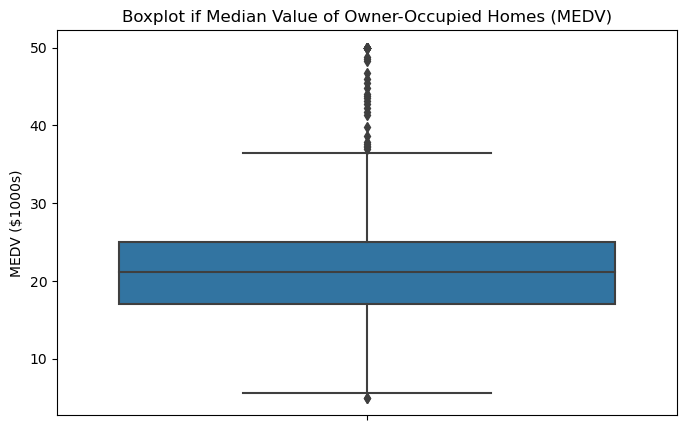

In [23]:
# Boxplit for MEDV

plt.figure(figsize=(8, 5))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot if Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000s)')
plt.show()

2_Provide a  bar plot for the Charles river variable

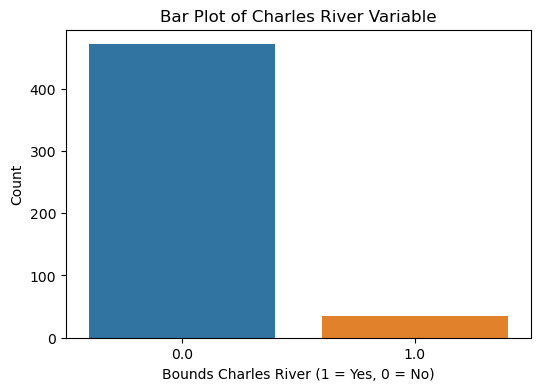

In [24]:
# bar plot for CHAS
 
plt.figure(figsize=(6, 4))
sns.countplot(x = 'CHAS', data = boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Bounds Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()    



3_Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [25]:
# Discreptize AGE into categories
bins = [0, 35, 70, 100]
labels = ['<=35 years', '36-70 years', '>70 years']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)



<function matplotlib.pyplot.show(close=None, block=None)>

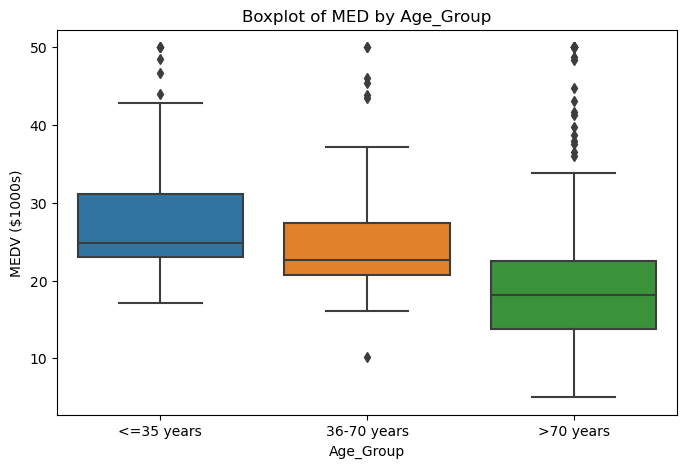

In [26]:
# boxplot MEDV vs AGE group
plt.figure(figsize=(8, 5))
sns.boxplot(x = 'Age_Group', y= 'MEDV', data=boston_df)
plt.title('Boxplot of MED by Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('MEDV ($1000s)')
plt.show

Comment

Bar plot for Charles River Variable

Per the data descriptions above, the Charles River Variable (CHAS) is a dummy variable with values of 0 and 1. The barplot will show the counts of each value.

4_Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

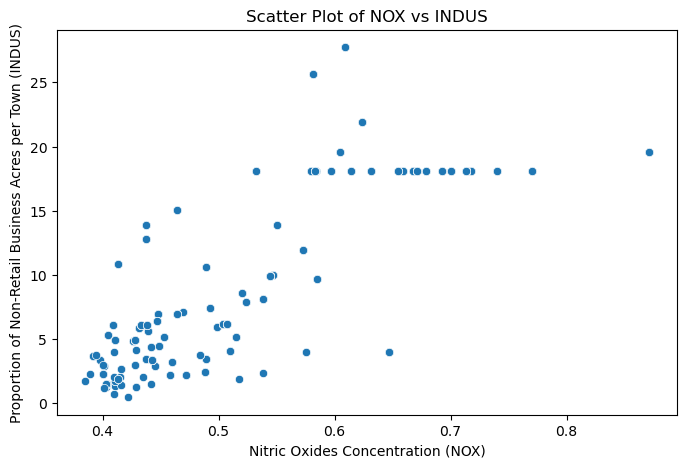

In [27]:
# Scatter okit fir NIX vs INDUS
plt.figure(figsize=(8, 5))
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxides Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.show()



Comments:
- there is clear upward trend as the proportion of non-retail business acres (INDUS) increase, the concentration of nitric oxides (NOX) also tends to increase
- this suggest a positive relationship between the two variables
- the points become more spread out at higher values of INDUS but the general direction is upward 

5_Create a histogram for the pupil to teacher ratio variable

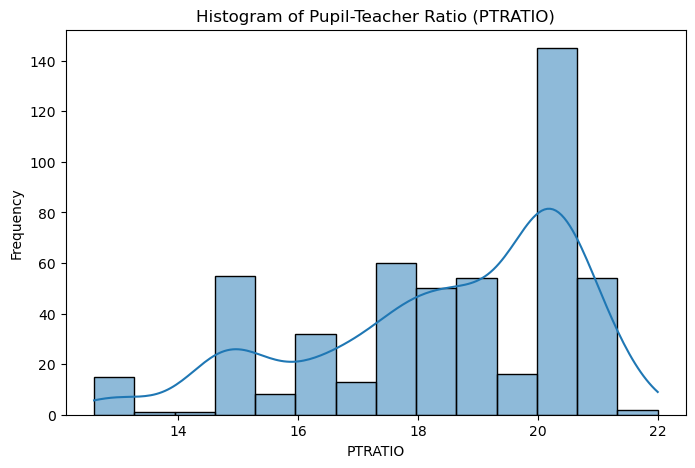

In [28]:
# histogram of PTRATIO
plt.figure(figsize=(8,5))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

KDE Line (blue curve): The Kernel Density Estimate overlays a smoothed version of the distribution.
- it confirms the concentration of data points around the 20–21 range.
- the curve dips at lower and higher ends, showing fewer schools with extremely low or high PTRATIO.

### Task 3: Use the appropriate tests to answer the questions provided.

1_Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Alpha = 0.05

State the hypothesis: 
- H0: mean 1 = mean 2: there is no difference in median values of houses bounded by Charles Rivee
- H1: mean 1 != mean 2: there is a difference in median values of houses bounded by Charles River

In [29]:
chas_yes = boston_df[boston_df['CHAS'] == 1] ['MEDV'] 
chas_no = boston_df[boston_df['CHAS'] == 0] ['MEDV']

t_stat, p_val = ttest_ind(chas_yes, chas_no)
print('T-statistic:{t_stat:.4f}, P=value: {p_val:.4f}')
if p_val < 0.05:
    print('we reject the null hypothesis. There is a significant difference in MEDV')
else:
    print('We fail to reject the null hypothesis. No significant difference in MEDV')

T-statistic:{t_stat:.4f}, P=value: {p_val:.4f}
we reject the null hypothesis. There is a significant difference in MEDV


2_Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Alpha = 0.05

State the hypothesis:

- H0: mean 1 = mean 2 = mean 3: the three population means are equal
- H1:  at least one of the means differ

In [30]:
group_1 = boston_df[boston_df['Age_Group'] == '<=35 years']['MEDV']
group_2 = boston_df[boston_df['Age_Group'] == '36-70 years']['MEDV']
group_3 = boston_df[boston_df['Age_Group'] == '>70 years']['MEDV'] 

f_stat, p_val = f_oneway(group_1, group_2, group_3)
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print('we reject the null hypothesis. There is a significant difference among AGE groups')
else:
    print('we fail to reject the null hypothesis. No significant difference among AGE group')

F-statistic: 36.4076, P-value: 0.0000
we reject the null hypothesis. There is a significant difference among AGE groups


3_Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

- H0: there is no relationship between the nitric oxide concentrations and the proportions of non-retail acres per town
- H1: there is a relationship between the nitric oxide concentrations and the proportions of non-retail acres per town

In [31]:
corr_coef, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation coefficient: {corr_coef:.4f}, P-value {p_val:.4f}")
if p_val < 0.05:
    print("There is a significant correlation between NOX and INDUS")
else:
    print('There is no significant correlation between NOX and INDUS')

Correlation coefficient: 0.7637, P-value 0.0000
There is a significant correlation between NOX and INDUS


4_What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis

- H0: there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied home
- H1: there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied home

In [32]:
X = boston_df[['DIS']]
X = sm.add_constant(X)
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        08:18:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied home.